### Mutual info score

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the training data set

In [4]:
import pandas as pd
df=pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing values

In [6]:
s=df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate X and Y

In [8]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y=df[['Survived']]

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Seperate cat and con for X

In [11]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Sex', 'Cabin', 'Embarked']

In [13]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Feature selection pipeline
categorical feature -Ordinal Encoding

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
# Num_pipe1
num_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

# Cat pipe1
cat_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ordinal', OrdinalEncoder())])

# Combine both pipelines
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])

In [16]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [17]:
cols = pre1.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [18]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()


,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0


### Preprocessing with Mutual Information Scores


In [19]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)

In [20]:
mi

array([0.04685863, 0.01243336, 0.02394409, 0.00726521, 0.12375909,
       0.16511022, 0.04454782, 0.02174708])

In [21]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.165110
num__Fare        0.123759
num__Pclass      0.046859
cat__Cabin       0.044548
num__SibSp       0.023944
cat__Embarked    0.021747
num__Age         0.012433
num__Parch       0.007265
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

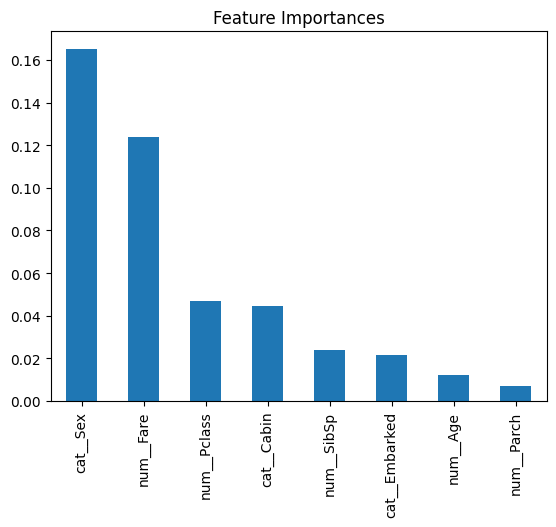

In [22]:
mi.plot(kind='bar', title='Feature Importances')

In [23]:
sel_features = list(mi.index[0:6])
sel_features

['cat__Sex',
 'num__Fare',
 'num__Pclass',
 'cat__Cabin',
 'num__SibSp',
 'cat__Embarked']

In [24]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=6)
sel_feat = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols


array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Fare', 'cat__Sex',
       'cat__Cabin'], dtype=object)

### Get the important columns dataframe

In [25]:
sel_cols[0].split('__')[1]

'Pclass'

In [26]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)


In [31]:
imp_cols

['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Cabin']

In [29]:
X_sel = X[imp_cols]
X_sel.head()

,Pclass,Age,SibSp,Fare,Sex,Cabin
0,3,22.0,1,7.2500,male,NaN
1,1,38.0,1,71.2833,female,C85
2,3,26.0,0,7.9250,female,NaN
3,1,35.0,1,53.1000,female,C123
4,3,35.0,0,8.0500,male,NaN


### Seperate Cat_sel and Con_sel

In [32]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [33]:
cat_sel

['Sex', 'Cabin']

In [34]:
con_sel

['Pclass', 'Age', 'SibSp', 'Fare']

### Create a final preprocessing pipeline

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
num_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('Ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])


In [37]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [38]:
final_cols = pre2.get_feature_names_out()
final_cols



array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       'cat__Cabin_B79

In [39]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,-0.565736,0.432793,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.433312,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train test split

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [41]:
xtrain.shape

(712, 154)

In [42]:
xtest.shape

(179, 154)

### Applying Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

## Calcuate accuracy in train and test

In [44]:
model.score(xtrain, ytrain)

0.8258426966292135

In [45]:
model.score(xtest, ytest)

0.8044692737430168

### Predict on train and test

In [46]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)


In [47]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [49]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [50]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Plot confusion matrix

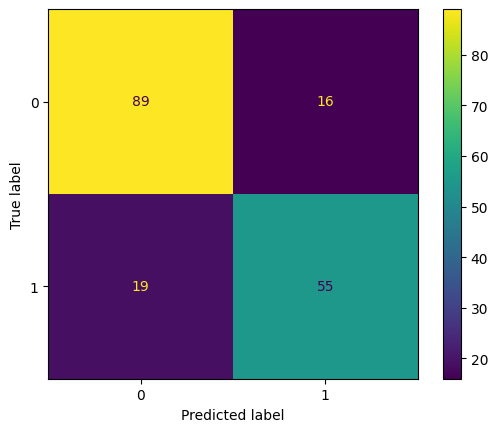

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()


## Show the classification report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



### Predicing results for test_titanic.csv

In [53]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ]])

In [55]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,0.394887,-0.474545,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,1.355510,0.432793,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.181487,-0.474545,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Predict results with probability

In [56]:
preds = model.predict(xnew_pre)
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
prob = model.predict_proba(xnew_pre)[:,1]
prob

array([0.09476563, 0.40396321, 0.08490915, 0.11773526, 0.60523479,
       0.16856342, 0.62702011, 0.17795184, 0.71153699, 0.07578195,
       0.11422459, 0.25679939, 0.93714266, 0.06153801, 0.83242891,
       0.76183156, 0.18174522, 0.13872781, 0.56330676, 0.50940012,
       0.16558898, 0.1895461 , 0.89688215, 0.46005207, 0.92171036,
       0.04326299, 0.9542495 , 0.13308351, 0.42703229, 0.06108315,
       0.09046351, 0.13932876, 0.52462211, 0.56636544, 0.4061474 ,
       0.14858157, 0.64216013, 0.6922863 , 0.1248195 , 0.12909058,
       0.08432507, 0.52779868, 0.07834659, 0.78416955, 0.87122205,
       0.12432728, 0.39545323, 0.11418232, 0.86541203, 0.58683082,
       0.49337662, 0.22434724, 0.71413586, 0.87240053, 0.21908756,
       0.05426836, 0.09341615, 0.18625336, 0.08419772, 0.95943165,
       0.15501589, 0.19700266, 0.15081104, 0.68483834, 0.64404724,
       0.79853287, 0.71191916, 0.25966329, 0.50521654, 0.83487396,
       0.67085986, 0.13895766, 0.63468014, 0.52464043, 0.95476

## Save the values to Dataframe

In [58]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [59]:
df_final['Survived_pred'] = preds
df_final['Survived_prob'] = prob

In [60]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.094766
1,893,0,0.403963
2,894,0,0.084909
3,895,0,0.117735
4,896,1,0.605235
...,...,...,...
413,1305,0,0.114269
414,1306,1,0.932604
415,1307,0,0.084198
416,1308,0,0.114269


In [61]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    262
1    156
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

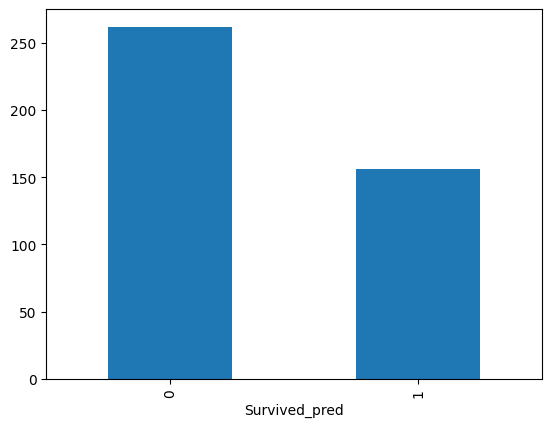

In [62]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

## Saving results to csv

In [63]:
df_final.to_csv('FeatureSelectionResults.csv', index=False)